In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload 
# module to read raw data
import src.data.data_reading as dr
reload(dr)

# module to clean data 
import src.scripts.data_cleaning as dc
reload(dc)

# module for data wrangling 
import src.utils.data_wrangling as dw
reload(dw)



<module 'src.utils.data_wrangling' from 'c:\\Users\\valbi\\Desktop\\Ma3\\ADA\\Projet1\\ada-2024-project-spaghettisolution copy\\src\\utils\\data_wrangling.py'>

In [20]:
def plot_event_movies(df_movies, event_words, event_name, country=None):
    
    pattern_event = '|'.join(event_words)

    df_event_movies = df_movies[df_movies['plot'].str.lower().str.contains(pattern_event, case=False, na=False)]

    if country:
        total_movies_per_year = (
            df_movies[df_movies["country"] == country]['release_date']
            .value_counts()
            .sort_index()
        )
    else:
        total_movies_per_year = (
            df_movies['release_date']
            .value_counts()
            .sort_index()
        )

    event_movies_per_year = (
        df_event_movies['release_date']
        .value_counts()
        .sort_index()
    )

    normalized_event_movies_per_year = event_movies_per_year / total_movies_per_year

    plt.figure(figsize=(12, 6))
    event_movies_per_year.plot(kind='bar', color='blue')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.title(f'Frequency of {event_name}-Related Movies per Year')
    if country:
        plt.title(f'Frequency of {event_name}-Related Movies per Year in {country}')
    plt.show()

    normalized_event_movies_per_year = normalized_event_movies_per_year[normalized_event_movies_per_year > 0]

    plt.figure(figsize=(12, 6))
    normalized_event_movies_per_year.plot(kind='bar', color='blue')
    plt.xlabel('Year')
    plt.ylabel('Normalized Number of Movies')
    plt.title(f'Normalized Frequency of {event_name}-Related Movies per Year')
    if country:
        plt.title(f'Normalized Frequency of {event_name}-Related Movies per Year in {country}')
    plt.show()


In [2]:
characters_df, movies_df, plots_df = dr.read_datas()
movies_df.head(2)

,freebase_id,name,release_date,revenue,runtime,languages,country,genres
wiki_id,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


In [3]:
movies_clean_df = dc.clean_movies_df(movies_df, plots_df)
print(movies_clean_df.shape)
movies_clean_df.head(5)

(81840, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
wiki_id,,,,,,,,
330,Actrius,1996.0,NaN,90.0,"Catalan , Spanish",Spain,"Drama, Comedy-drama",In order to prepare the role of an important o...
3217,Army of Darkness,1992.0,21502796.0,81.0,English,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","After being pulled through a time portal, Ash ..."
3333,The Birth of a Nation,1915.0,50000000.0,190.0,"Silent film, English",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",The film follows two juxtaposed families: the...
3746,Blade Runner,1982.0,33139618.0,116.0,"Japanese , Cantonese, English , German , Hunga...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...","{{Hatnote}} In Los Angeles, November 2019, ret..."
3837,Blazing Saddles,1974.0,119500000.0,93.0,"Yiddish , English",United States of America,"Western, Satire, Comedy","In the American Old West of 1874, construction..."


In [5]:
genres = movies_clean_df['genres'].dropna().unique()
unique_genres = set()
for genre_list in genres:
    for genre in genre_list.split(', '):
        unique_genres.add(genre)
genres = np.array(list(unique_genres))
print(genres)
len(genres)

['Whodunit' 'Filipino Movies' 'Epic Western' "Children's/Family"
 'Historical fiction' 'Biographical film' 'Drama' 'Horror' 'Biography'
 'Bengali Cinema' 'Pinku eiga' 'Fantasy Drama' 'Domestic Comedy'
 'Foreign legion' 'Chick flick' 'Americana' 'Sex comedy' 'Expressionism'
 'Finance & Investing' 'Erotic Drama' 'Bollywood' 'Supermarionation'
 'Neorealism' 'Spaghetti Western' 'Action' 'Buddy Picture' 'Time travel'
 'Indie' 'Media Satire' 'Stand-up comedy' 'Comedy of manners' 'Dystopia'
 'Superhero movie' 'Computers' 'Tragicomedy' 'Archaeology'
 'Backstage Musical' 'Creature Film' 'Extreme Sports' 'Social issues'
 'Operetta' 'Disaster' 'Erotic thriller' 'Social problem film'
 'Czechoslovak New Wave' 'Japanese Movies' 'Political satire' 'Dance'
 'Costume drama' 'Fictional film' 'Erotica' 'Revisionist Western'
 'Chase Movie' 'Softcore Porn' 'Culture & Society' 'Archives and records'
 'Slapstick' 'Historical Documentaries' 'Essay Film' 'Art film'
 'Hip hop movies' 'Wuxia' 'Race movie' 'Patri

363

In [6]:
war_action_movies_df = movies_clean_df[movies_clean_df['genres'].str.contains('War|Action', case=False, na=False)]
print(war_action_movies_df.shape)
war_action_movies_df.head()

(12160, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
wiki_id,,,,,,,,
3217,Army of Darkness,1992.0,21502796.0,81.0,English,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","After being pulled through a time portal, Ash ..."
3333,The Birth of a Nation,1915.0,50000000.0,190.0,"Silent film, English",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",The film follows two juxtaposed families: the...
4227,Barry Lyndon,1975.0,20000000.0,187.0,"French , English , German","United States of America, United Kingdom","Costume drama, Film adaptation, Period piece, ...",:By What Means Redmond Barry Acquired the Sty...
4231,Buffy the Vampire Slayer,1992.0,16624456.0,86.0,English,United States of America,"Action, Horror, Comedy, Horror Comedy",Buffy Summers is introduced as a stereotypica...
4560,Braveheart,1995.0,211409945.0,175.0,"French , Latin , English , Gaelic",United States of America,"Biography, Adventure, History, War film, Actio...","In the 13th century, after several years of po..."


In [7]:
other_movies_df = movies_clean_df[~movies_clean_df.index.isin(war_action_movies_df.index)]
print(other_movies_df.shape)
other_movies_df.head()
american_others_df = other_movies_df[other_movies_df['country'].str.contains('United States of America', case=False, na=False)]
print(american_others_df.shape)


(69680, 8)
(28316, 8)


In [8]:
sub_dfs = [american_others_df.iloc[i:i + 4000] for i in range(0, len(american_others_df), 4000)]
for idx, sub_df in enumerate(sub_dfs):
    print(f"Sub DataFrame {idx} shape: {sub_df.shape}")
    sub_df.to_csv(f'american_others_part_{idx}.csv', index=False)

Sub DataFrame 0 shape: (4000, 8)
Sub DataFrame 1 shape: (4000, 8)
Sub DataFrame 2 shape: (4000, 8)
Sub DataFrame 3 shape: (4000, 8)
Sub DataFrame 4 shape: (4000, 8)
Sub DataFrame 5 shape: (4000, 8)
Sub DataFrame 6 shape: (4000, 8)
Sub DataFrame 7 shape: (316, 8)


In [3]:
war_action_movies_df.to_csv('war_action_movies.csv', index=False)


NameError: name 'war_action_movies_df' is not defined

In [5]:
war_action_movies_df = pd.read_csv('../war_action_movies.csv')
print(war_action_movies_df.shape)
war_action_movies_df.head()

(12160, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
0,Army of Darkness,1992.0,21502796.0,81.0,English,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","After being pulled through a time portal, Ash ..."
1,The Birth of a Nation,1915.0,50000000.0,190.0,"Silent film, English",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",The film follows two juxtaposed families: the...
2,Barry Lyndon,1975.0,20000000.0,187.0,"French , English , German","United States of America, United Kingdom","Costume drama, Film adaptation, Period piece, ...",:By What Means Redmond Barry Acquired the Sty...
3,Buffy the Vampire Slayer,1992.0,16624456.0,86.0,English,United States of America,"Action, Horror, Comedy, Horror Comedy",Buffy Summers is introduced as a stereotypica...
4,Braveheart,1995.0,211409945.0,175.0,"French , Latin , English , Gaelic",United States of America,"Biography, Adventure, History, War film, Actio...","In the 13th century, after several years of po..."


In [22]:
war_action_movies_df = war_action_movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
war_action_movies_df = war_action_movies_df[war_action_movies_df['country'].str.contains('united states of america', case=False, na=False)]


C:\Users\valbi\AppData\Local\Temp\ipykernel_1960\1732880539.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  war_action_movies_df = war_action_movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


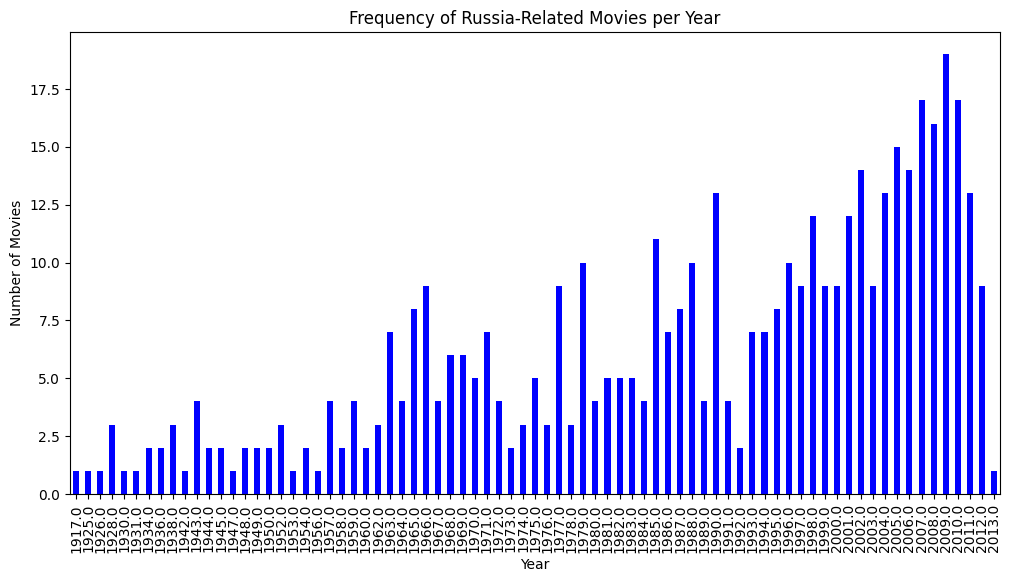

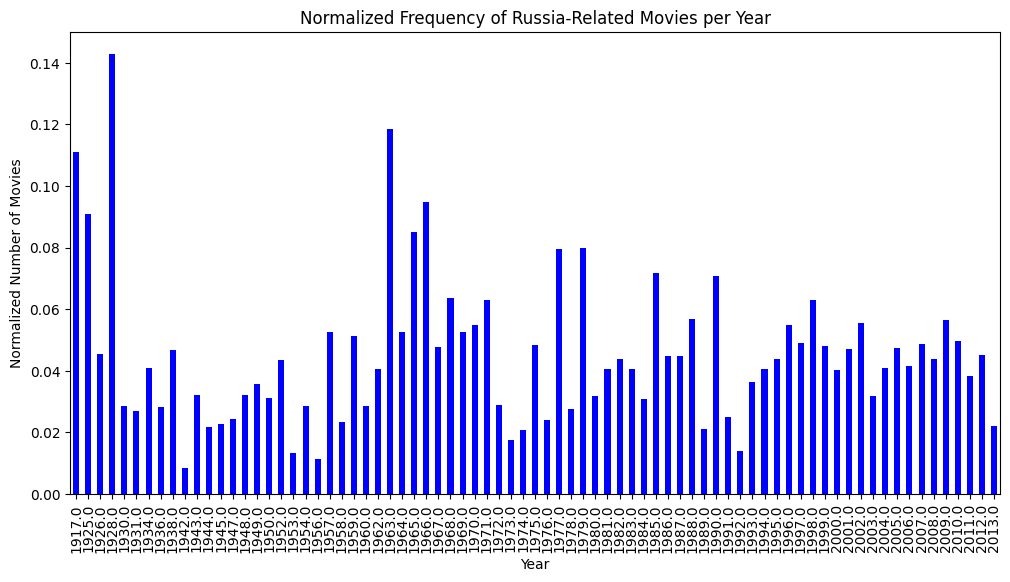

In [21]:
keywords = ['russia', 'russian', 'soviet', 'moscow', 'kremlin', 'kgb','USSR']
plot_event_movies(war_action_movies_df, keywords, 'Russia')

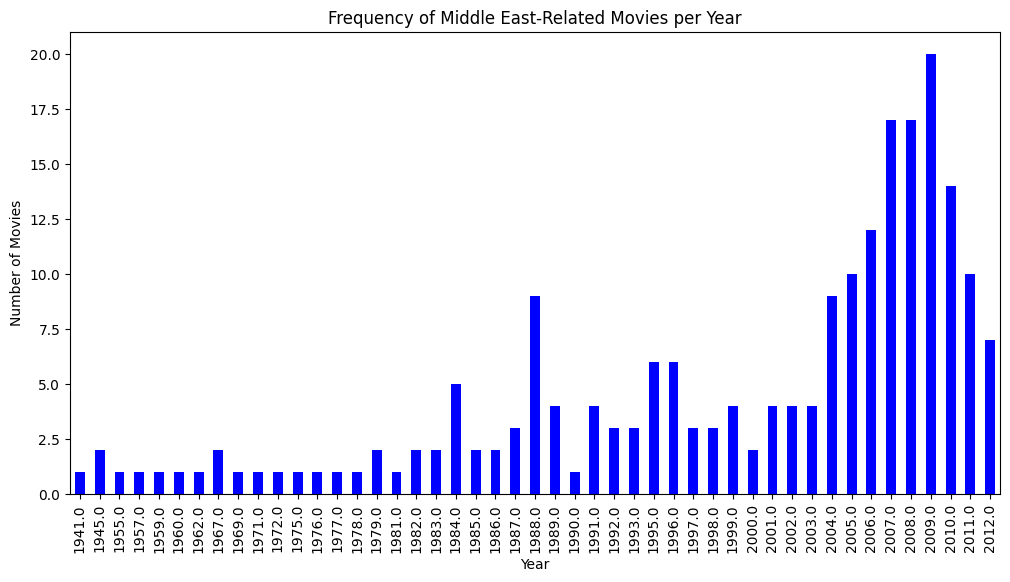

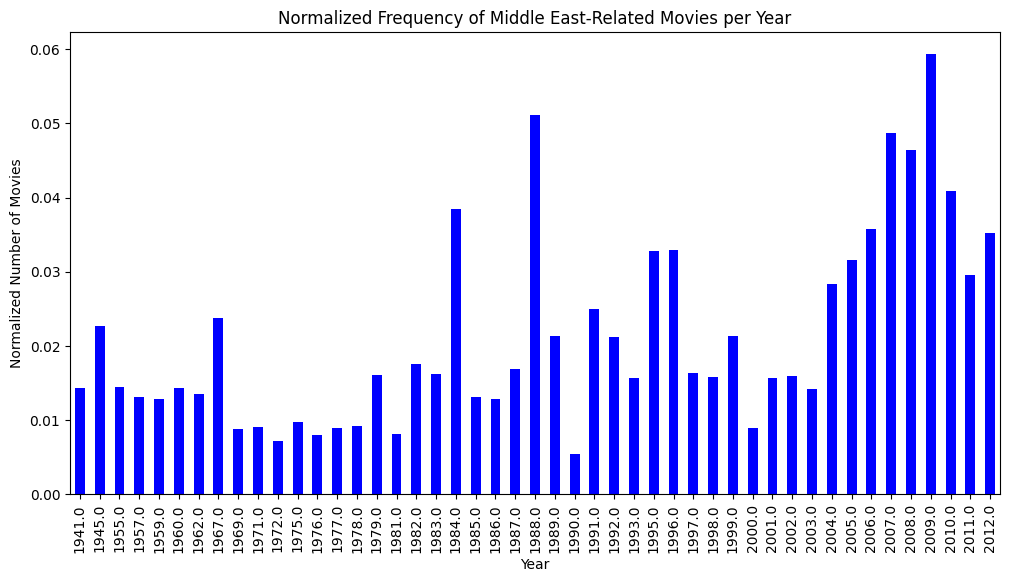

In [22]:
keywords = ['iran', 'iraq', 'afghanistan', 'syria', 'arabic', 'middle east']
plot_event_movies(war_action_movies_df, keywords, 'Middle East')

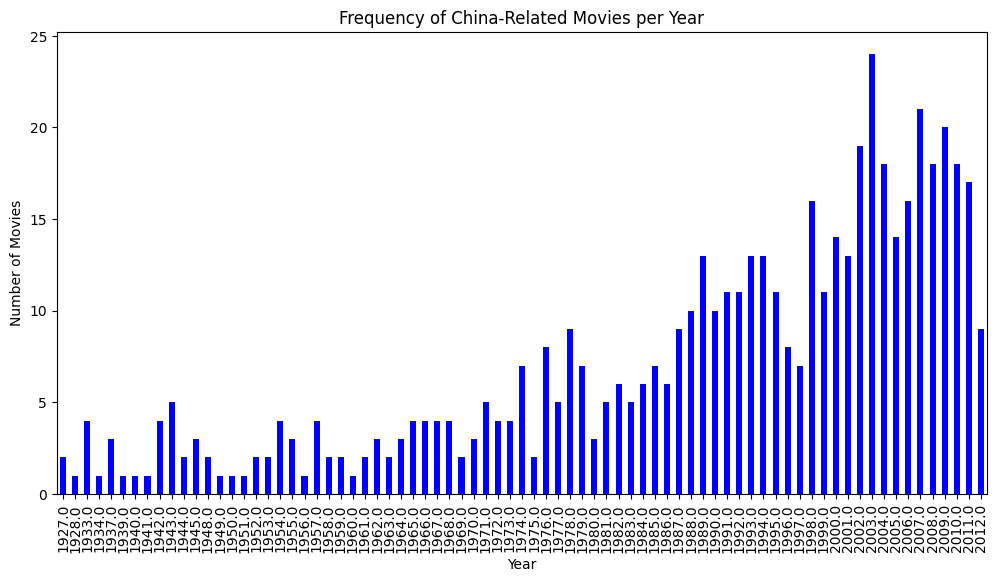

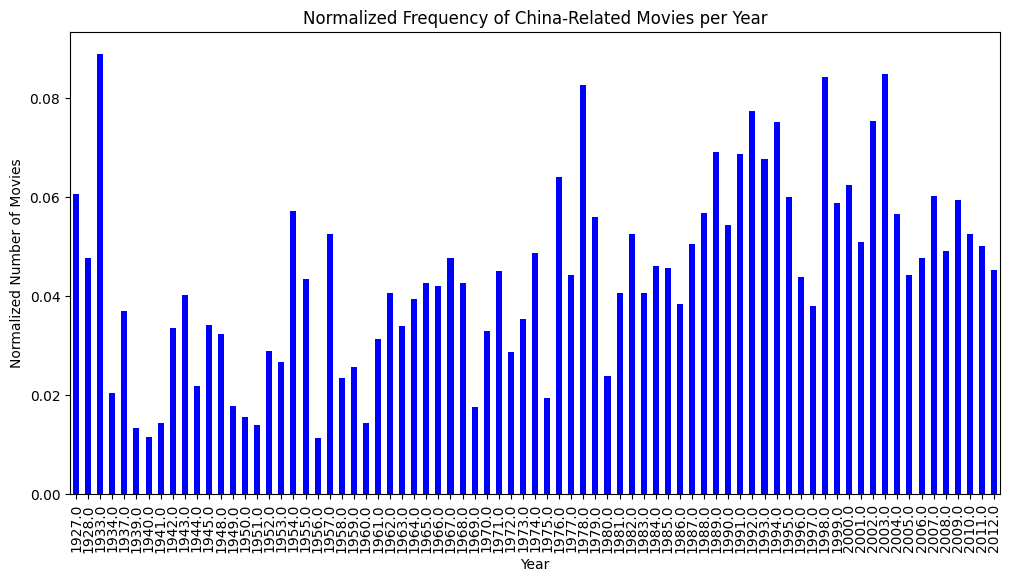

In [23]:
keywords = ['china', 'chinese', 'beijing', 'shanghai', 'hong kong', 'taiwan']
plot_event_movies(war_action_movies_df, keywords, 'China')

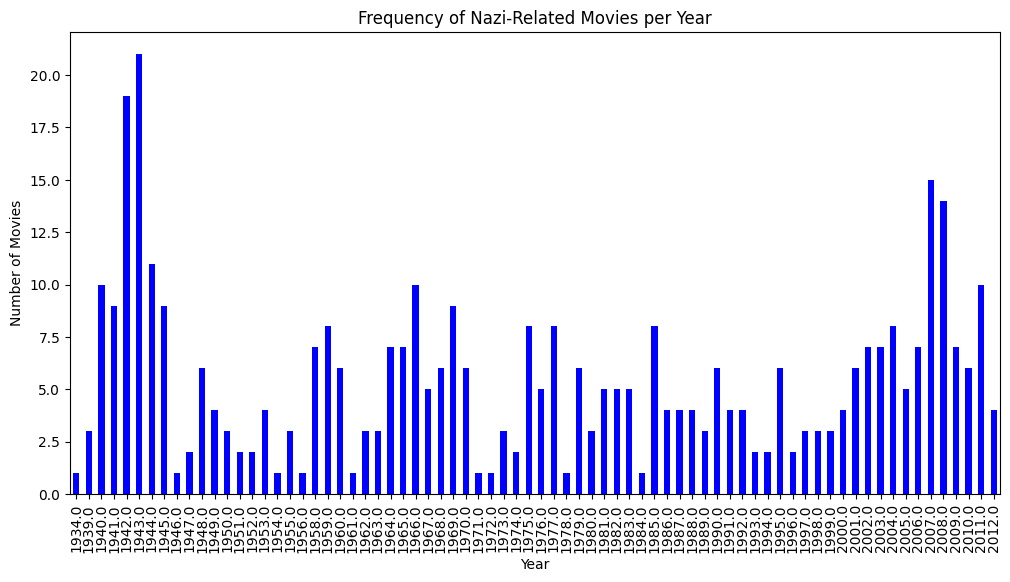

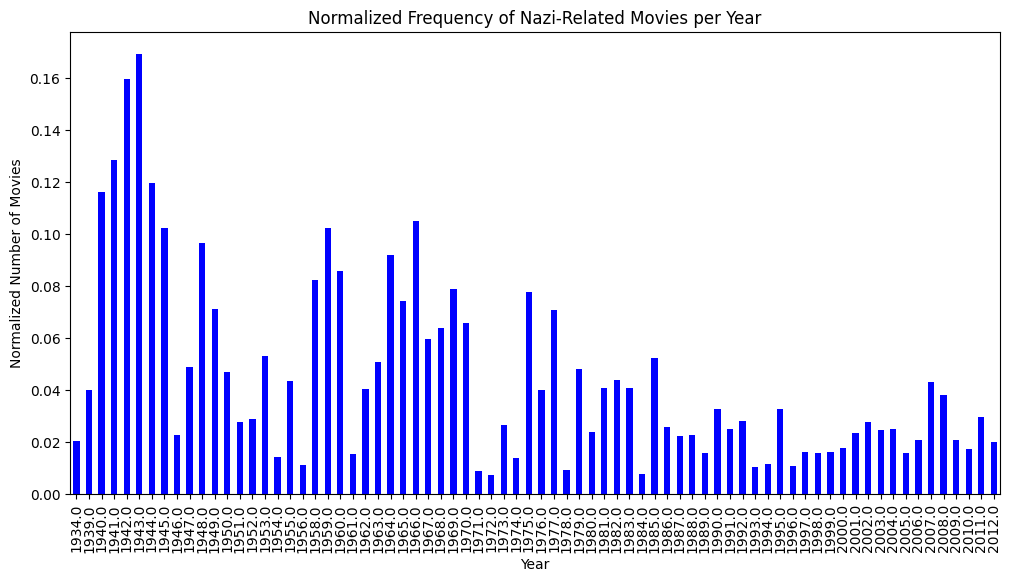

In [24]:
keywords = ['nazi', 'hitler', 'third reich', 'gestapo', 'holocaust','iii reich', 'reichsführer', 'reichstag', 'reichsmark',' ss ']
plot_event_movies(war_action_movies_df, keywords, 'Nazi')

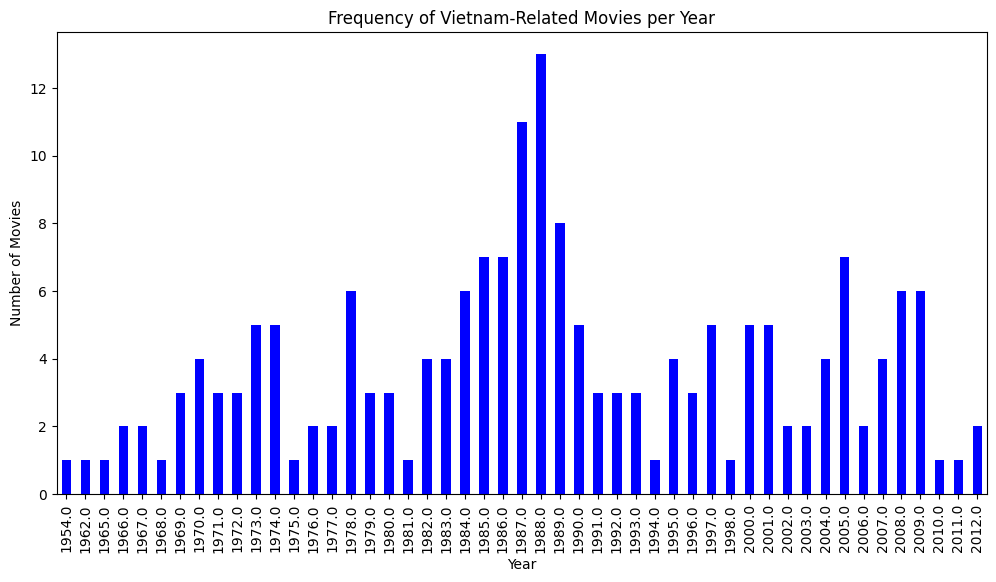

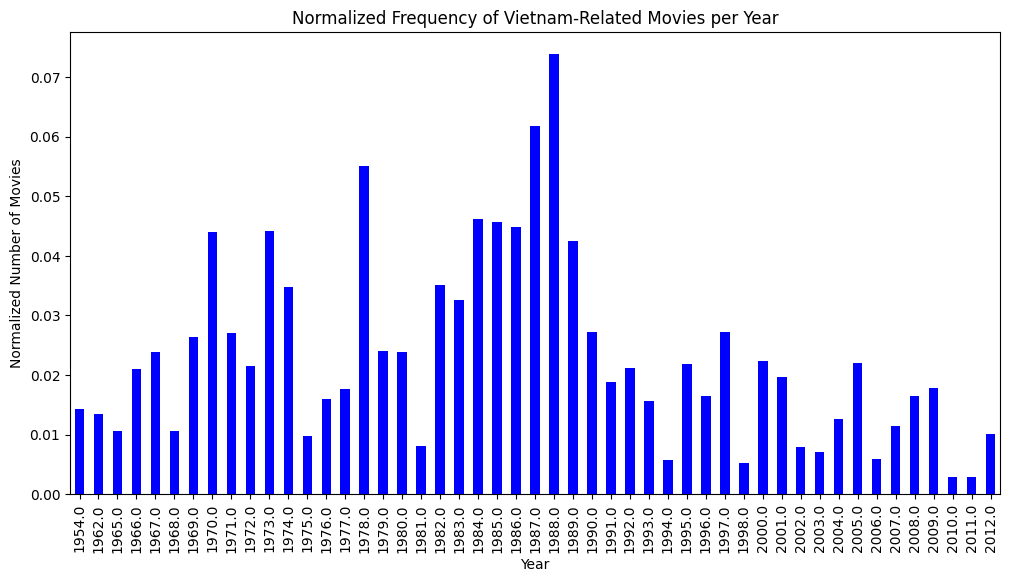

In [28]:
keywords = ['vietnam', 'viet cong', 'saigon', 'hanoi', 'vietminh']
plot_event_movies(war_action_movies_df, keywords, 'Vietnam')

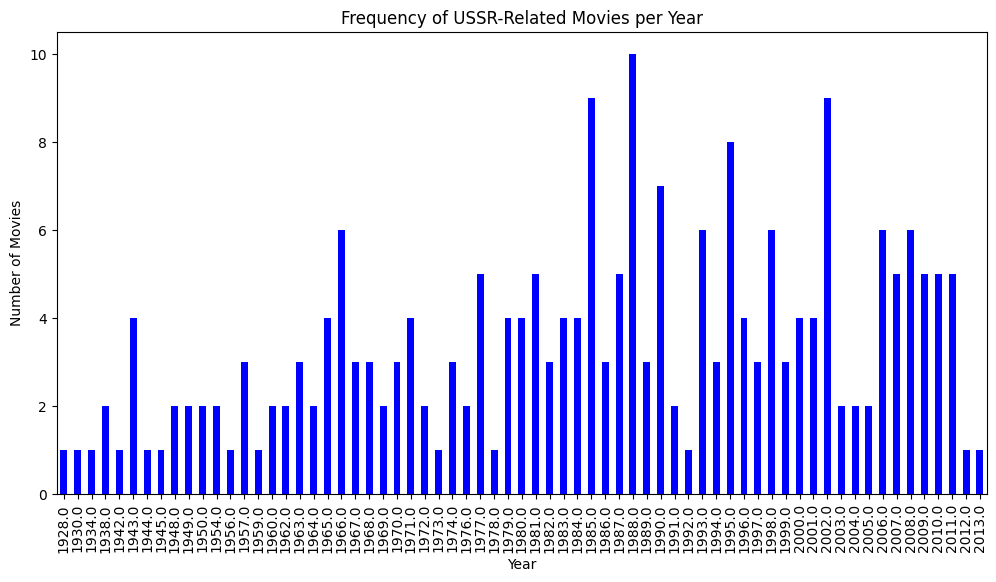

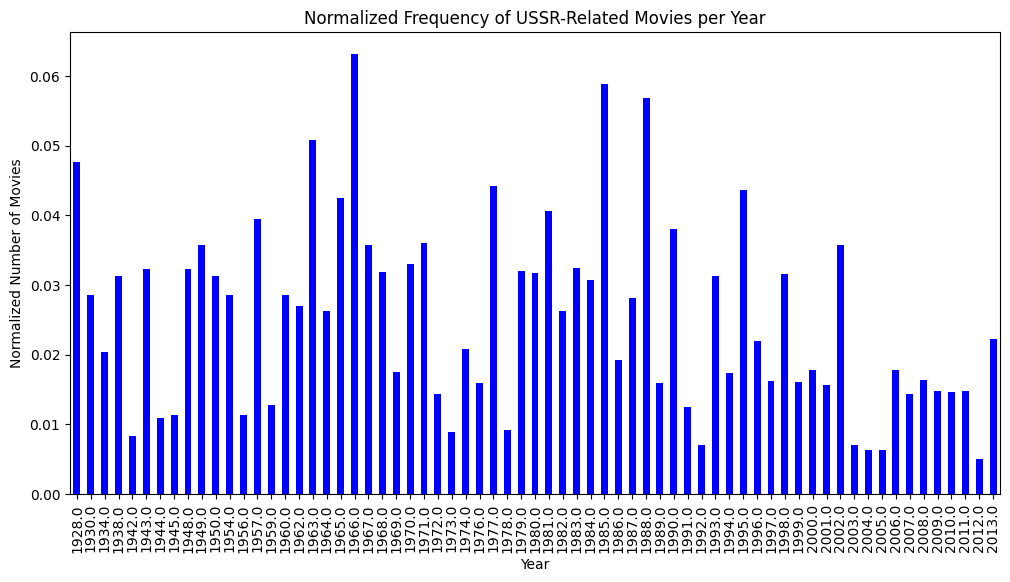

In [33]:
keywords = ['ussr', 'soviet', 'kgb', 'stalin', 'staline', 'gorbatchev','lenin', 'trotsky']
plot_event_movies(war_action_movies_df, keywords, 'USSR')

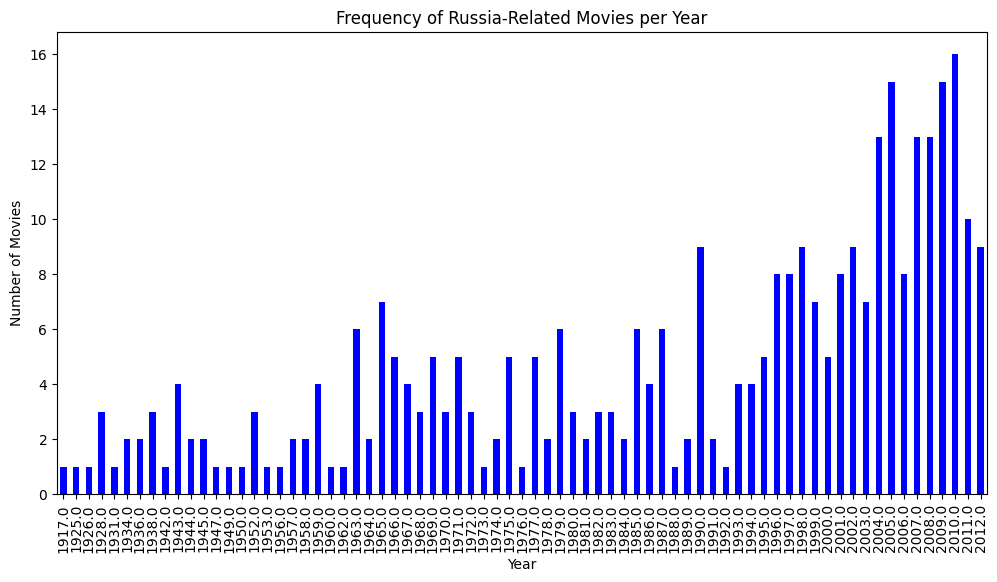

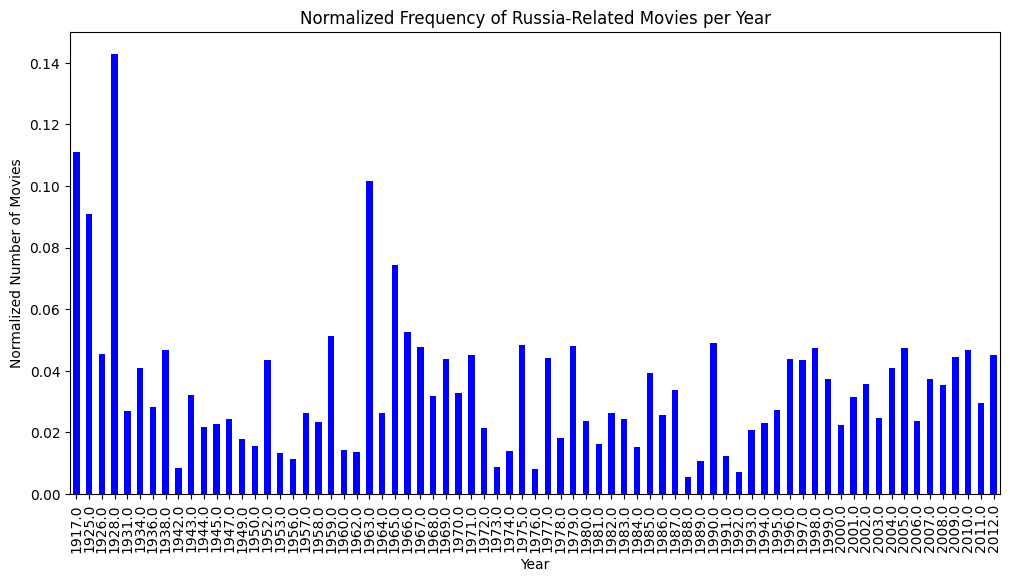

In [34]:
keywords = ['russia', 'russian', 'putin']
plot_event_movies(war_action_movies_df, keywords, 'Russia')